# HW8
## MACSS 30000
## Jie Heng

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster import hierarchy as hr
%matplotlib inline
df = pd.read_csv('unsupervised-learning\data\College.csv')

## Question 1

a. Perform PCA analysis on the college dataset and plot the first two principal components

In [7]:
# Convert not numerical variable: Private
df.Private = pd.get_dummies(df.Private)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0,1660.0,1232.0,721.0,23.0,52.0,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,0,2186.0,1924.0,512.0,16.0,29.0,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,30.0,12.2,16.0,10527.0,56.0
2,0,1428.0,1097.0,336.0,22.0,50.0,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,0,417.0,349.0,137.0,60.0,89.0,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,19016.0,59.0
4,0,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,4120.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0


In [8]:
# Dataframe columns scaling with sklearn
new_df = pd.DataFrame(scale(df),  columns=df.columns)
pca_df = PCA().fit(df)
# Get columns:
Columns = []
for i in range(len(df.columns)):
    Columns.append("PC{}".format(i+1))

In [9]:
# Loading PCA
loading_pca = pd.DataFrame(pca_df.components_.T, index=df.columns, columns=Columns)
num_of_V = len(df.columns)
loading_pca['dist'] = abs(np.array(loading_pca.PC2)/ np.array(loading_pca.PC1))
sorted = loading_pca.sort_values(by=['dist'])
sorted

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,dist
Apps,0.557026,-0.039361,-0.167353,0.664271,0.164687,0.058050,1.343426e-01,0.411794,-0.027407,-0.003760,0.004389,-0.003022,-0.000531,0.000401,0.000589,0.001128,-0.000187,3.369198e-05,0.070662
Accept,0.347712,-0.077162,-0.162363,0.232927,0.005806,0.060281,-2.399573e-01,-0.841807,0.149990,0.005824,-0.008233,0.005367,0.001760,0.001075,-0.001251,-0.002473,0.000233,-4.257937e-05,0.221914
Enroll,0.129854,-0.045413,-0.009663,-0.058832,-0.064077,0.021307,-4.089118e-02,-0.118368,-0.978310,-0.007720,0.007086,-0.006926,0.001317,-0.003497,0.002619,0.003102,0.000062,1.062978e-05,0.349722
Books,0.003734,0.001429,0.002740,-0.000882,0.006591,-0.021247,4.972845e-02,-0.009805,-0.009178,0.998364,0.002387,-0.004619,-0.006341,0.001228,-0.004781,0.002347,-0.000348,-6.057803e-05,0.382694
F.Undergrad,0.670614,-0.283672,0.024672,-0.584959,-0.281437,-0.085317,1.332175e-02,0.148604,0.135160,-0.000612,0.001956,0.001117,-0.000713,0.000346,-0.000352,-0.000159,-0.000174,2.915661e-05,0.423003
P.Undergrad,0.111113,-0.080380,0.066142,-0.302818,0.923535,0.146195,-1.026036e-01,-0.000183,-0.017002,0.001231,-0.002052,0.002486,-0.000572,-0.000020,-0.000068,-0.000338,0.000011,9.338211e-06,0.723405
PhD,0.001139,0.000873,-0.000628,-0.001064,0.000215,-0.000739,-3.391354e-04,0.000643,0.000235,-0.006068,-0.450245,-0.571218,-0.168315,-0.077123,-0.599396,0.275942,-0.035117,4.049226e-03,0.766333
Terminal,0.000990,0.000834,-0.000677,-0.001126,0.000288,-0.001474,-4.799486e-04,0.000421,0.001569,0.001425,-0.368978,-0.532295,-0.148250,0.034096,0.666708,-0.335874,0.006243,4.012987e-03,0.842571
Top25perc,0.001177,0.001497,-0.000773,-0.000182,-0.001910,0.000552,1.250961e-03,0.006428,-0.004481,0.005660,-0.622037,0.342503,0.383308,-0.049361,0.278177,0.518568,0.001247,2.027582e-04,1.271456
Personal,0.023132,-0.029838,0.060305,-0.049733,0.066304,0.083084,9.494853e-01,-0.277907,-0.001388,-0.048960,-0.002141,0.001246,-0.001975,0.001216,0.000369,-0.000076,0.000372,-2.778609e-07,1.289883


In [10]:
sorted.PC2.sort_values(ascending = False)

Expend         0.753153
Outstate       0.569323
Room.Board     0.105991
Top10perc      0.001706
Top25perc      0.001497
Books          0.001429
Grad.Rate      0.001365
perc.alumni    0.001108
PhD            0.000873
Terminal       0.000834
Private       -0.000040
S.F.Ratio     -0.000428
Personal      -0.029838
Apps          -0.039361
Enroll        -0.045413
Accept        -0.077162
P.Undergrad   -0.080380
F.Undergrad   -0.283672
Name: PC2, dtype: float64

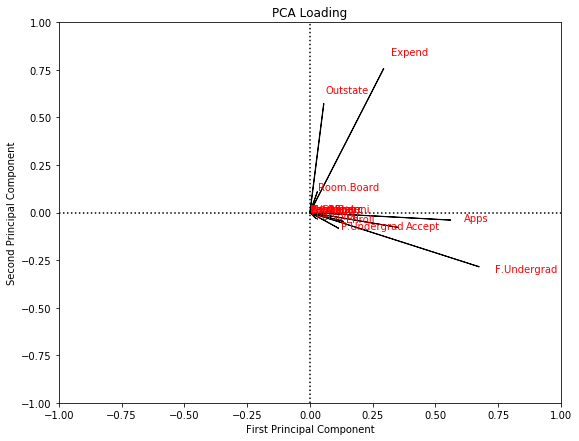

In [11]:
# Plot
fig , ax = plt.subplots(figsize=(9,7))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.hlines(0,-1, 1, linestyles='dotted')
ax.vlines(0,-1, 1, linestyles='dotted',)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')

a = 1.1
for i in loading_pca[['PC1', 'PC2']].index:
    ax.annotate(i, (loading_pca.PC1.loc[i] * a, loading_pca.PC2.loc[i] * a), color='red')

for i in range(num_of_V):
    ax.arrow(0,0,loading_pca.PC1[i], loading_pca.PC2[i])
ax.set_title('PCA Loading')

The first component is strongly correlated with 
    - Apps
    - Accept 
    - Enroll

The second component is strongly correlated with 
    - Room.Board
    - Expend 
    - Outstate

b. Cumulative proportion of variance explained

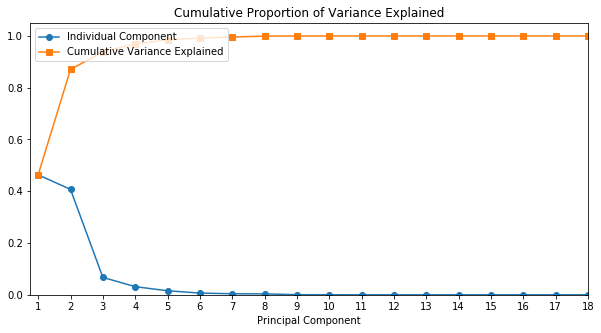

In [12]:
plt.figure(figsize=(10,5))
plt.plot(list(range(1, num_of_V + 1)), pca_df.explained_variance_ratio_, '-o', label='Individual Component')
plt.plot(list(range(1,num_of_V + 1)), np.cumsum(pca_df.explained_variance_ratio_), '-s', label='Cumulative Variance Explained')

plt.title('Cumulative Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75, 4.25)
plt.ylim(0, 1.05)
plt.xticks(list(range(1, num_of_V + 1)))
plt.legend(loc = 2)

In [13]:
per = pca_df.explained_variance_ratio_[:2].sum()*100
result = round(per,2)
print(result,'% of variance is explained by the first two components.')

87.08 % of variance is explained by the first two components.


## Question 2


### 1. Perform PCA on the dataset and plot the observations on the first and second principal components. 

In [14]:
# Load the data: states
df1 = pd.read_csv('USArrests.csv', index_col=0)

In [21]:
# Use PCA to analyze the data
pca1 = PCA()
pca_data = pca1.fit_transform(df1)
pca_1_d = pca_data[:, :2]
pca_1 = pd.DataFrame(pca_1_d,index = df1.index, columns = ['PC1', 'PC2'])
pca_1.head()


,PC1,PC2
State,,
Alabama,64.802164,11.448007
Alaska,92.827450,17.982943
Arizona,124.068216,-8.830403
Arkansas,18.340035,16.703911
California,107.422953,-22.520070


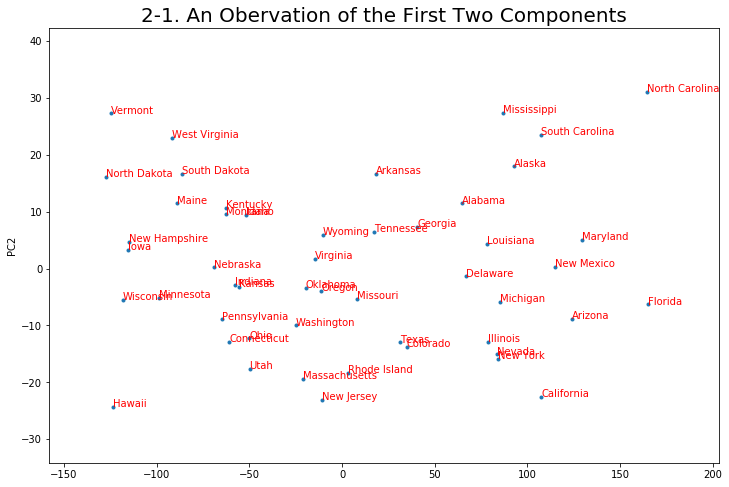

In [22]:
# Plot
xmin = pca_1['PC1'].min()
xmax = pca_1['PC1'].max()
ymin = pca_1['PC2'].min()
ymax = pca_1['PC2'].max()
plt.figure(figsize= (12,8))
plt.xlim(xmin * 1.2 - 5, xmax * 1.2 + 5)
plt.ylim(ymin * 1.2 - 5, ymax * 1.2 + 5)
plt.scatter(x = pca_1['PC1'], y = pca_1['PC2'], marker = '.')
# Ass annotate
for i in pca_1.index:
    plt.annotate(i, (pca_1.loc[i]['PC1'], pca_1.loc[i]['PC2']),color = 'red')
plt.ylabel('PC2')
plt.title('2-1. An Obervation of the First Two Components', size = 20)   
plt.show()

### 2-5. Perform K-means clustering with K=2

In [26]:
def kmeans(df,n, ax, title):
    kmeans = KMeans(n_clusters=n).fit(df)
    labels = kmeans.labels_
    clusters = []
    colors = ['c','k','y','m']
    for m in range(n):
        clusters.append([])
        clusters[m] = pd.DataFrame([pca_1.iloc[j] for j in range(pca_1.shape[0]) if labels[j] == m])
        ax.scatter(x = clusters[m]['PC1'], y = clusters[m]['PC2'], 
                   marker = '.', c = colors[m], label = "Cluster " + str(m + 1), s = 100)
        for j in clusters[m].index:
            ax.annotate(j, (clusters[m].loc[j]['PC1'], clusters[m].loc[j]['PC2']), 
                        color = colors[m], ha = 'center', size = 10)            
    centers = kmeans.cluster_centers_
    pca_new = pca1.fit_transform(centers)
    ax.scatter(x = pca_new[:, 0], y = pca_new[:, 1], marker = 'x', c = 'r', label = 'Centers', s = 100)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')  
    ax.set_title(title, size = 20)
    ax.margins(x = 0.1, y =0.1)
    ax.legend()
    return clusters

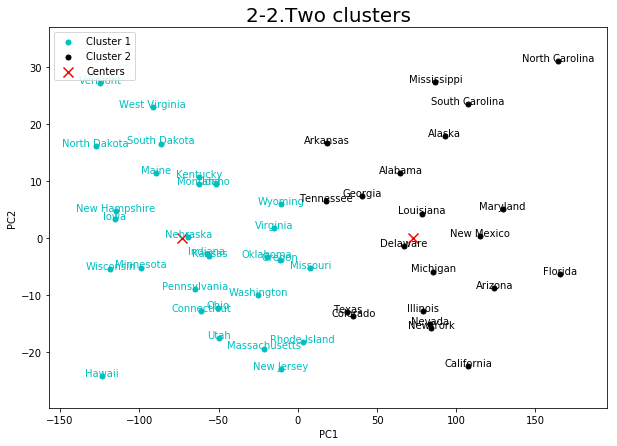

In [27]:
figure, axes = plt.subplots(figsize = (10,7))
kmeans(df1,2, axes, "2-2.Two clusters")
plt.show()

### Describe:

In [28]:
clusters1 = kmeans(df1,2, axes, "2-2.Two clusters")
print('If we divide the data into 2 clusters')
print('')
print('In the first clusters, there are the following states:')
print(clusters1[0].index.tolist())
print('')
print('In the second clusters, there are the following states:')
print(clusters1[1].index.tolist())

If we divide the data into 2 clusters

In the first clusters, there are the following states:
['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Massachusetts', 'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

In the second clusters, there are the following states:
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Delaware', 'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina', 'Tennessee', 'Texas']


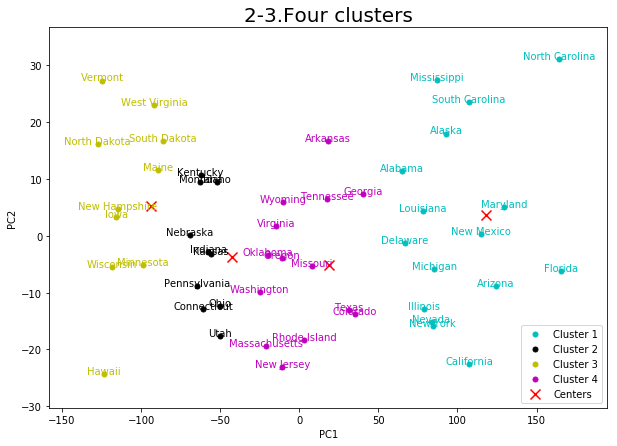

In [29]:
figure, axes = plt.subplots(figsize = (10,7))
kmeans(df1,4, axes,"2-3.Four clusters")
plt.show()

### Describe:

In [30]:
clusters2 = kmeans(df1, 4, axes,"2-3.Four clusters")
print('If we divide the data into 4 clusters')
print('')
print('In the first clusters, there are the following states:')
print(clusters2[0].index.tolist())
print('')
print('In the second clusters, there are the following states:')
print(clusters2[1].index.tolist())
print('')
print('In the third clusters, there are the following states:')
print(clusters2[2].index.tolist())
print('')
print('In the fourth clusters, there are the following states:')
print(clusters2[3].index.tolist())

If we divide the data into 4 clusters

In the first clusters, there are the following states:
['Connecticut', 'Idaho', 'Indiana', 'Kansas', 'Kentucky', 'Montana', 'Nebraska', 'Ohio', 'Pennsylvania', 'Utah']

In the second clusters, there are the following states:
['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']

In the third clusters, there are the following states:
['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']

In the fourth clusters, there are the following states:
['Hawaii', 'Iowa', 'Maine', 'Minnesota', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']


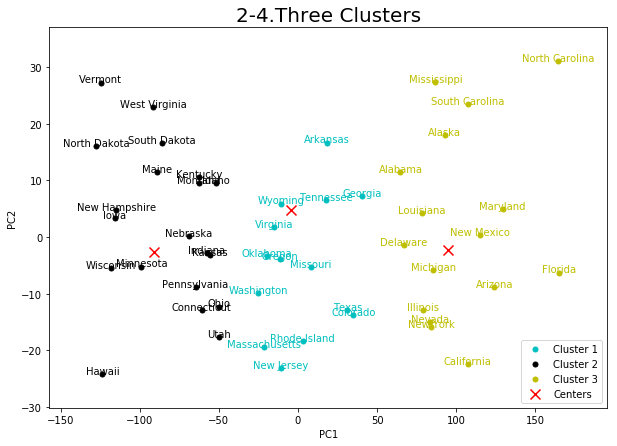

In [31]:
figure, axes = plt.subplots(figsize = (10,7))
kmeans(df1,3, axes, "2-4.Three Clusters")
plt.show()

### Describe:

In [32]:
clusters3 =  kmeans(df1,3, axes, "2-4.Three Clusters")
print('If we divide the data into 3 clusters')
print('')
print('In the first clusters, there are the following states:')
print(clusters3[0].index.tolist())
print('')
print('In the second clusters, there are the following states:')
print(clusters3[1].index.tolist())
print('')
print('In the third clusters, there are the following states:')
print(clusters3[2].index.tolist())

If we divide the data into 3 clusters

In the first clusters, there are the following states:
['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin']

In the second clusters, there are the following states:
['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']

In the third clusters, there are the following states:
['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']


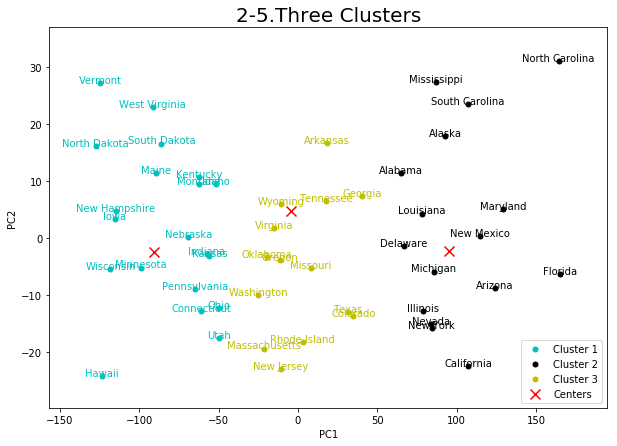

In [33]:
figure, axes = plt.subplots(figsize = (10,7))
kmeans(pca_1, 3, axes, "2-5.Three Clusters")
plt.show()

### Describe:

In [34]:
print('If we perform PCA on score vectors rather than the raw data')
clusters4 =  kmeans(pca_1, 3, axes, "2-5.Three Clusters")
print('If we divide the data into 3 clusters')
print('')
print('In the first clusters, there are the following states:')
print(clusters4[0].index.tolist())
print('')
print('In the second clusters, there are the following states:')
print(clusters4[1].index.tolist())
print('')
print('In the third clusters, there are the following states:')
print(clusters4[2].index.tolist())

If we perform PCA on score vectors rather than the raw data
If we divide the data into 3 clusters

In the first clusters, there are the following states:
['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin']

In the second clusters, there are the following states:
['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']

In the third clusters, there are the following states:
['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']


### Compare:

From the two graphs above, we could barely observe the differece bwtween '2-4' and '2-5'. By comparing the states and centers in different clusters, we also find that they are identical. 

### 6. Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states

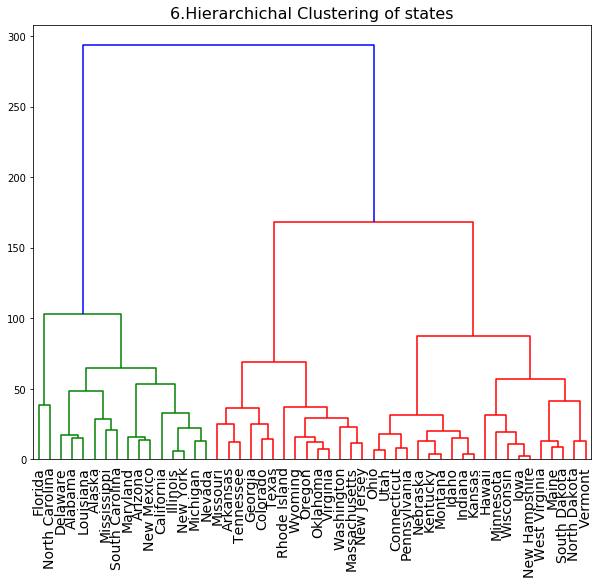

In [35]:
h_clustering = hr.complete(df1)
plt.figure(figsize = (10,8))
hr.dendrogram(h_clustering, labels = df1.index, leaf_font_size=14)
plt.title("6.Hierarchichal Clustering of states",fontsize = 16)
plt.show()

### 7. Cut the dendrogram at a height that results in three distinct clusters.

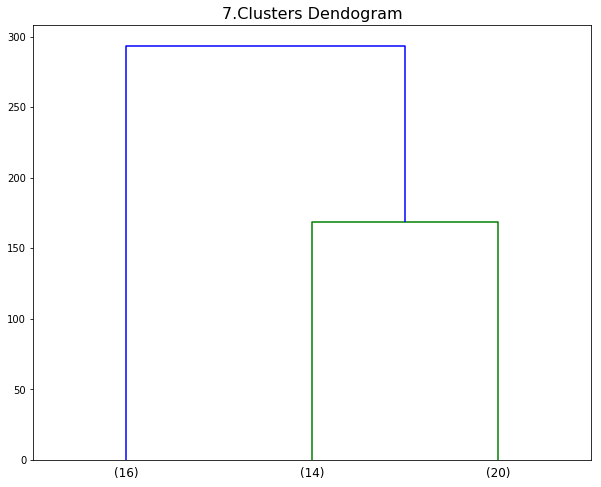

In [38]:
h_clustering = hr.complete(df1)
plt.figure(figsize = (10,8))
hr.dendrogram(h_clustering, truncate_mode='lastp', p=3, labels = df1.index)
plt.title("7.Clusters Dendogram",fontsize = 16)
plt.show()

### 8.Scaling the variables and plot

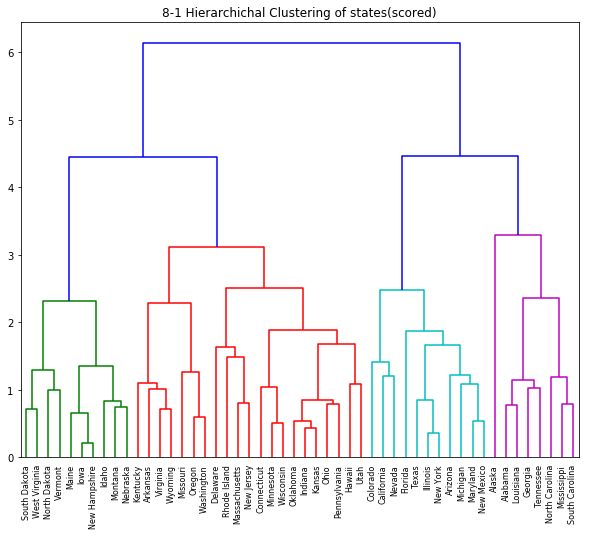

In [45]:
scaled = pd.DataFrame(scale(df1), index = df1.index, columns = df1.columns)
hr_scaled = hr.complete(scaled)
plt.figure(figsize = (10, 8))
hr.dendrogram(hr_scaled, labels = scaled.index)
plt.title("8 Hierarchichal Clustering of states(scored)")
plt.show()

In [47]:
print(df1.head())
print('')
print("After scaled:")
print(scaled.head())

            Murder  Assault  UrbanPop  Rape
State                                      
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

After scaled:
              Murder   Assault  UrbanPop      Rape
State                                             
Alabama     1.255179  0.790787 -0.526195 -0.003451
Alaska      0.513019  1.118060 -1.224067  2.509424
Arizona     0.072361  1.493817  1.009122  1.053466
Arkansas    0.234708  0.233212 -1.084492 -0.186794
California  0.281093  1.275635  1.776781  2.088814


From four graphs above, although the structure are nearly the same, states are sorted to different groups using different methods(scaled or not). It also seems that the scaled vectors influence the formation of clusters, especialy at an earlier height. Therefore, to get a clearer analysis from the data, scaling is needed.